In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('fast')

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv('./data/second_innings.csv')
df = df[['match_id', 'ball', 'runs_off_bat', 'extras', 'wicket_type', 'runs_required', 'wickets_remaining', 'balls_remaining', 'crr', 'rrr', 'winner']]
df.head()

,match_id,ball,runs_off_bat,extras,wicket_type,runs_required,wickets_remaining,balls_remaining,crr,rrr,winner
0,1283048,0.1,0,0,caught,153.0,9.0,119.0,0.0,7.71,0.0
1,1283048,0.2,0,0,NaN,153.0,9.0,118.0,0.0,7.78,0.0
2,1283048,0.3,1,0,NaN,152.0,9.0,117.0,2.0,7.79,0.0
3,1283048,0.4,0,0,NaN,152.0,9.0,116.0,1.5,7.86,0.0
4,1283048,0.5,0,0,NaN,152.0,9.0,115.0,1.2,7.93,0.0


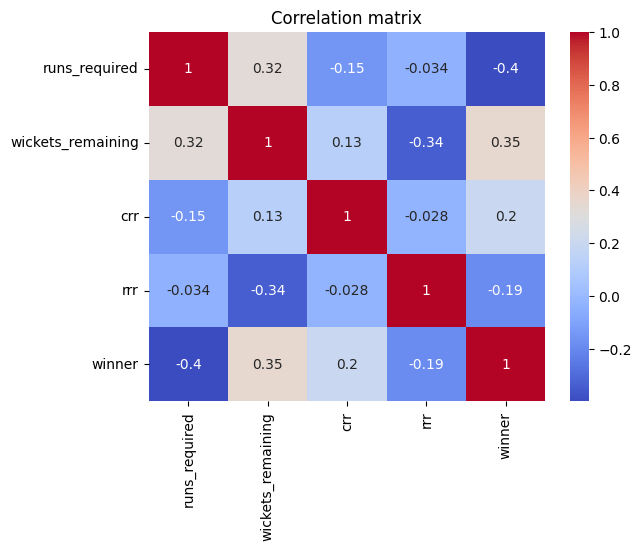

In [5]:
# correlation matrix
corr = df[['runs_required', 'wickets_remaining', 'crr', 'rrr', 'winner']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

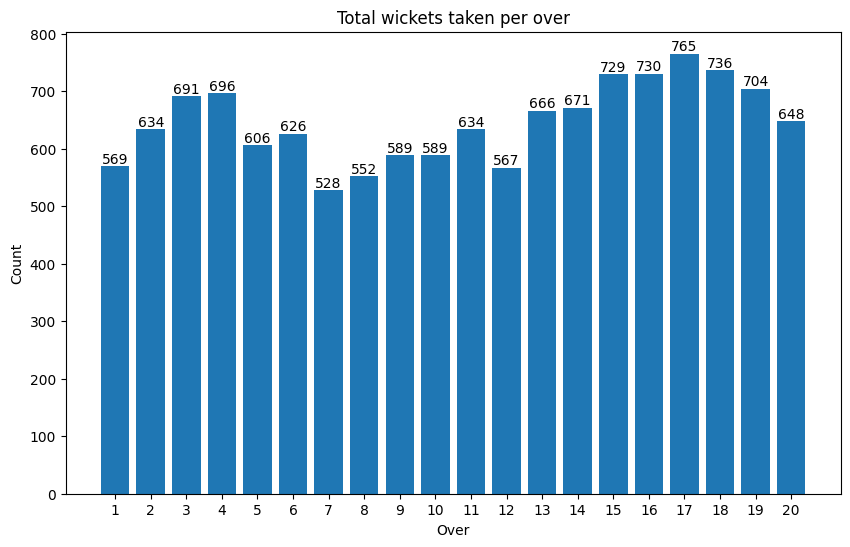

In [6]:
# which over saw the most fall of wickets
wickets = df[df['wicket_type'].notnull()].copy()
wickets['over'] = wickets['ball'].apply(lambda x: int(str(x + 1).split('.')[0]))
wickets = wickets.groupby('over').size().reset_index(name='count')
plt.figure(figsize=(10, 6))
plt.bar(wickets['over'], wickets['count'])
for i, count in enumerate(wickets['count']):
    plt.text(i + 1, count, str(count), ha='center', va='bottom')
plt.xticks(np.arange(1, 21, 1))
plt.title('Total wickets taken per over')
plt.xlabel('Over')
plt.ylabel('Count')
plt.show()

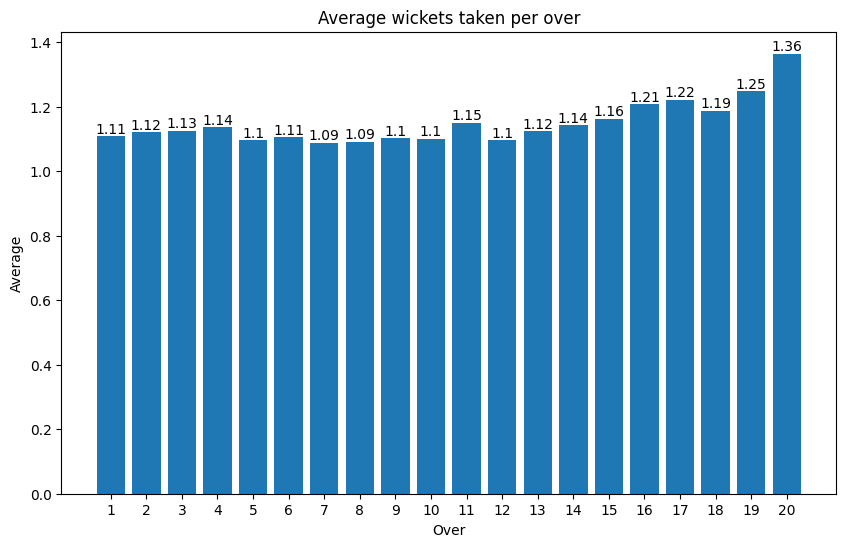

In [7]:
# average wickets per over per match
wickets = df[df['wicket_type'].notnull()].copy()
wickets['over'] = wickets['ball'].apply(lambda x: int(str(x + 1).split('.')[0]))
wickets = wickets.groupby(['match_id', 'over']).size().reset_index(name='count')
wickets = wickets.groupby('over')['count'].mean().reset_index(name='average')
plt.figure(figsize=(10, 6))
plt.bar(wickets['over'], wickets['average'])
for i, average in enumerate(wickets['average']):
    plt.text(i + 1, average, str(round(average, 2)), ha='center', va='bottom')
plt.xticks(np.arange(1, 21, 1))
plt.title('Average wickets taken per over')
plt.xlabel('Over')
plt.ylabel('Average')
plt.show()

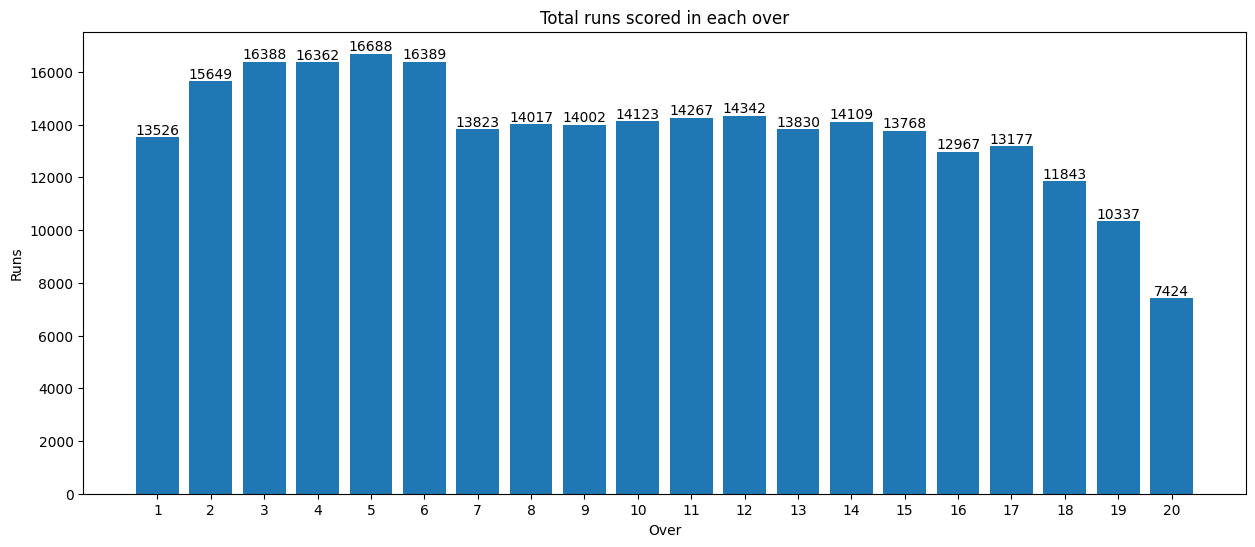

In [8]:
# which over sees the most runs
runs = df.copy()
runs['over'] = runs['ball'].apply(lambda x: int(str(x + 1).split('.')[0]))
runs['total_runs'] = runs['runs_off_bat'] + runs['extras']
runs = runs.groupby('over')['total_runs'].sum().reset_index(name='runs')
plt.figure(figsize=(15, 6))
plt.bar(runs['over'], runs['runs'])
for i, runs in enumerate(runs['runs']):
    plt.text(i + 1, runs, str(runs), ha='center', va='bottom')
plt.xticks(np.arange(1, 21, 1))
plt.title('Total runs scored in each over')
plt.xlabel('Over')
plt.ylabel('Runs')
plt.show()

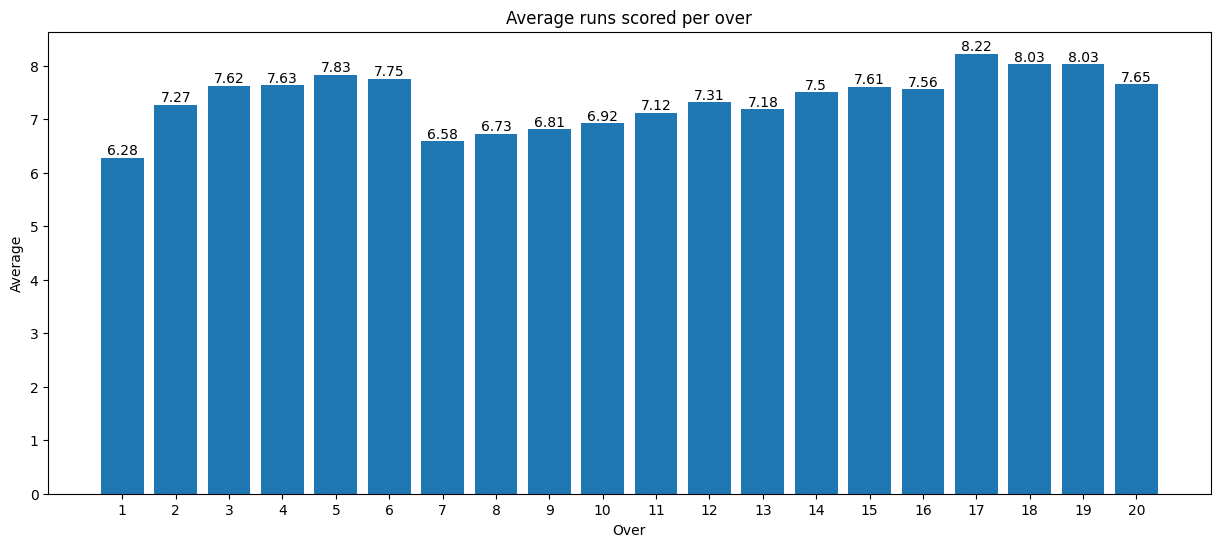

In [9]:
# average runs per over per match
runs = df.copy()
runs['over'] = runs['ball'].apply(lambda x: int(str(x + 1).split('.')[0]))
runs['total_runs'] = runs['runs_off_bat'] + runs['extras']
runs = runs.groupby(['match_id', 'over'])['total_runs'].sum().reset_index(name='runs')
runs = runs.groupby('over')['runs'].mean().reset_index(name='average')
plt.figure(figsize=(15, 6))
plt.bar(runs['over'], runs['average'])
for i, average in enumerate(runs['average']):
    plt.text(i + 1, average, str(round(average, 2)), ha='center', va='bottom')
plt.xticks(np.arange(1, 21, 1))
plt.title('Average runs scored per over')
plt.xlabel('Over')
plt.ylabel('Average')
plt.show()

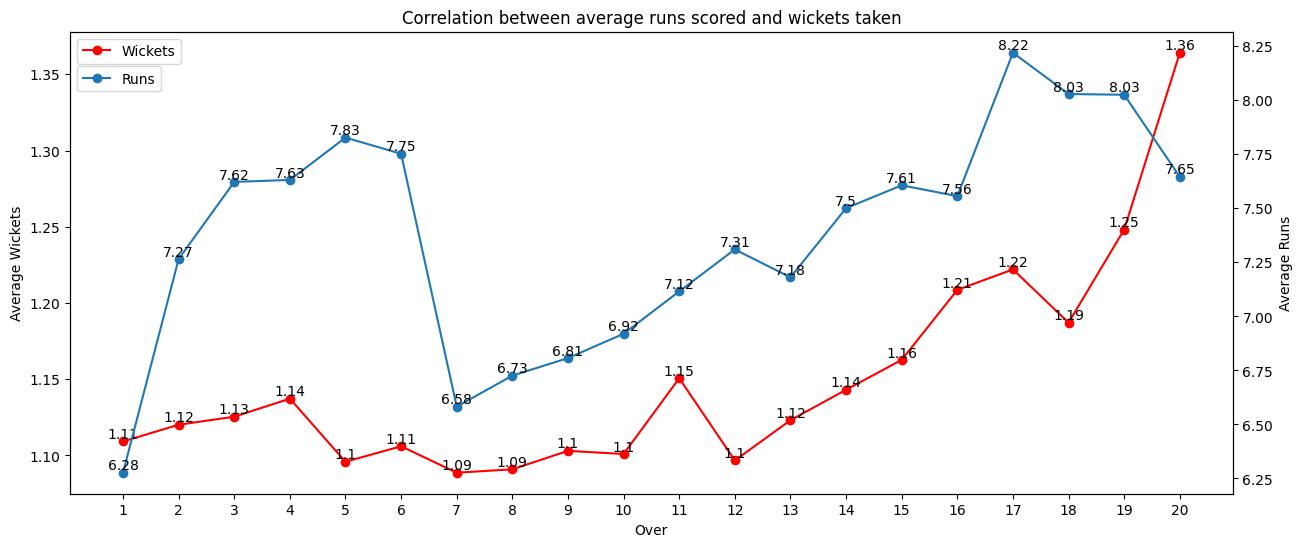

In [10]:
# line chart of runs per over per match and wickets per over per match
# use already existing dfs, we have the data
plt.figure(figsize=(15, 6))

plt.title('Correlation between average runs scored and wickets taken')

plt.plot(wickets['over'], wickets['average'], label='Wickets', marker='o')
# give wickets red colour
plt.gca().get_lines()[0].set_color('red')

plt.legend()
plt.xlabel('Over')

for i, average in enumerate(wickets['average']):
    plt.text(i + 1, average, str(round(average, 2)), ha='center', va='bottom')

plt.ylabel('Average Wickets')
# use a second y axis for the runs
plt.twinx()

plt.plot(runs['over'], runs['average'], label='Runs', marker='o')

for i, average in enumerate(runs['average']):
    plt.text(i + 1, average, str(round(average, 2)), ha='center', va='bottom')

plt.ylabel('Average Runs')

# display legend for runs on upper left but shift it down by a bit
plt.legend(loc='upper left', bbox_to_anchor=(0, 0.94))

plt.xticks(np.arange(1, 21, 1))
plt.show()

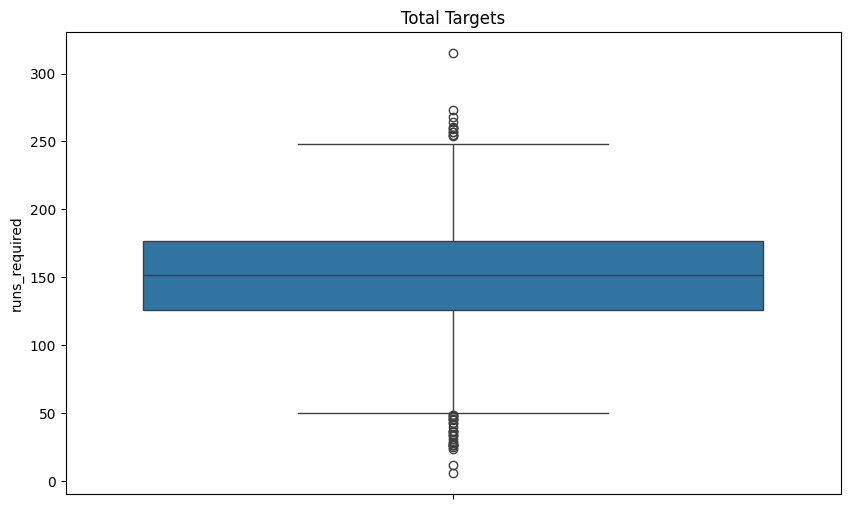

In [4]:
# outlier analysis
# boxplot for runs remaining with more than 119 balls remaining
plt.figure(figsize=(10, 6))
sns.boxplot(y='runs_required', data=df[(df['balls_remaining'] >= 119)])
plt.title('Total Targets')
plt.show()

# Old 👇

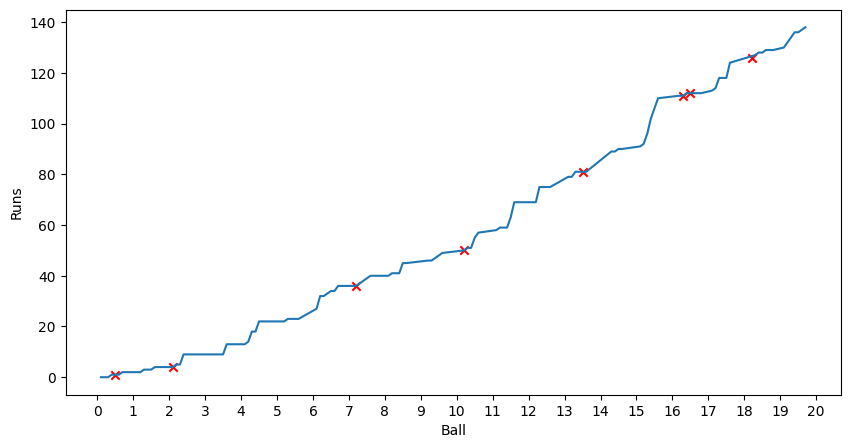

In [24]:
# visualize runs scored for match 1217744, innings 1
data = df[(df['match_id'] == 1407715) & (df['innings'] == 1)]
data = data[['ball', 'total_runs', 'wicket_type']]

plt.figure(figsize=(10, 5))
plt.plot(data['ball'], data['total_runs'])
# show an 'x' where there is a fall of wicket
# wicket falls where wicket_type is not null
plt.scatter(data['ball'][data['wicket_type'].notnull()], data['total_runs'][data['wicket_type'].notnull()], color='red', marker='x')
plt.xlabel('Ball')
plt.ylabel('Runs')
plt.show()

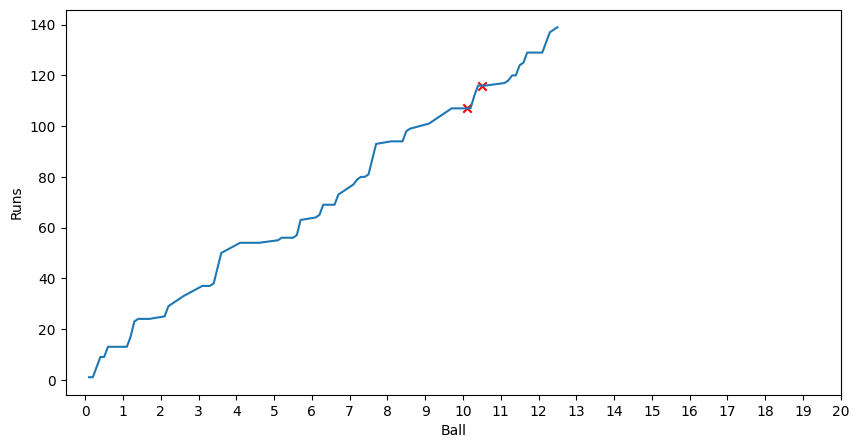

In [25]:
data = df[(df['match_id'] == 1407715) & (df['innings'] == 2)]
data = data[['ball', 'total_runs', 'wicket_type']]

plt.figure(figsize=(10, 5))
plt.plot(data['ball'], data['total_runs'])
# show an 'x' where there is a fall of wicket
# wicket falls where wicket_type is not null
plt.scatter(data['ball'][data['wicket_type'].notnull()], data['total_runs'][data['wicket_type'].notnull()], color='red', marker='x')
plt.xlabel('Ball')
plt.ylabel('Runs')
plt.show()

In [26]:
# find the median score for every inning
median_scores = df.groupby(['match_id', 'innings'])['runs_off_bat'].sum().reset_index()
median_scores = median_scores.groupby('innings')['runs_off_bat'].median().reset_index()
median_scores

,innings,runs_off_bat
0,1,150.0
1,2,132.0
2,3,13.0
3,4,10.0
4,5,11.0
5,6,1.0


In [27]:
df['innings'].unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [33]:
# show data for a match with 6 innings
df[df['match_id'] == 1389398]

,match_id,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,wicket_type,win_or_lose,fall_of_wickets,total_runs
373733,1389398,119,1,0.1,39,0,3268,2449,952,3,NaN,0,0,3
373734,1389398,119,1,0.2,39,0,2449,3268,952,4,NaN,0,0,7
373735,1389398,119,1,0.3,39,0,2449,3268,952,0,NaN,0,0,7
373736,1389398,119,1,0.4,39,0,2449,3268,952,0,NaN,0,0,7
373737,1389398,119,1,0.5,39,0,2449,3268,952,4,NaN,0,0,11
373738,1389398,119,1,0.6,39,0,2449,3268,952,0,NaN,0,0,11
373739,1389398,119,1,1.1,39,0,3268,2449,441,1,NaN,0,0,12
373740,1389398,119,1,1.2,39,0,2449,3268,441,0,NaN,0,0,12
373741,1389398,119,1,1.3,39,0,2449,3268,441,1,NaN,0,0,13
373742,1389398,119,1,1.4,39,0,3268,2449,441,0,NaN,0,0,13


In [32]:
df[df['innings'] == 6]['match_id'].unique()

array([1389398], dtype=int64)

In [49]:
# match with least number of balls bowled
df.groupby('match_id')['ball'].count().sort_values().head(10)

match_id
566927      2
1263166     8
1233956    16
1263167    18
1278691    22
1343742    25
730293     29
1343758    33
1407094    39
1349387    47
Name: ball, dtype: int64

In [54]:
df[df['match_id'] == 1144172]

,match_id,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,wicket_type,win_or_lose,fall_of_wickets,total_runs
34739,1144172,151,1,0.1,87,84,2072,3217,843,0,NaN,0,0,0
34740,1144172,151,1,0.2,87,84,2072,3217,843,0,caught,0,1,0
34741,1144172,151,1,0.3,87,84,514,3217,843,0,NaN,0,1,0
34742,1144172,151,1,0.4,87,84,514,3217,843,0,NaN,0,1,0
34743,1144172,151,1,0.5,87,84,514,3217,843,0,NaN,0,1,0
34744,1144172,151,1,0.6,87,84,514,3217,843,0,NaN,0,1,0
34745,1144172,151,1,1.1,87,84,3217,514,1521,0,NaN,0,1,0
34746,1144172,151,1,1.2,87,84,3217,514,1521,0,NaN,0,1,0
34747,1144172,151,1,1.3,87,84,3217,514,1521,6,NaN,0,1,6
34748,1144172,151,1,1.4,87,84,3217,514,1521,1,NaN,0,1,7


In [53]:
matches_with_no_winner = [
    1263166,  582186,  534234, 1263167, 1407094, 1144172, 1263164,
    423788, 1144991, 1188380, 1349389, 1405327,  366707, 1286674,
    1322277,  902653, 1267311, 1142504,  412681,  951319, 1177484,
    1343767, 1278691, 1198244, 1115799, 1343758, 1399120,  566927,
    1263472, 1370791, 1388214, 1197398, 1322362, 1186492, 1216418,
    1343747, 1343790,  237242, 1343746, 1400975, 1183527,  533282,
    1176795,  533292, 1317488, 1349127, 1339617, 1185187, 1343742,
    1298152,  533284, 1354799,  730293, 1343743, 1389398, 1187669,
    1141835, 1380586, 1233956, 1257949, 1317149,  350050, 1187680,
    1412534, 1203677,  287862,  571149, 1349387, 1041617, 1187679,
    1407719
]

match_ball_data = df.groupby('match_id')['ball'].count().sort_values()

for match in matches_with_no_winner:
    # print the number of ballls bowled in the match
    print(f"{match}: {match_ball_data[match]}")

1263166: 8
582186: 100
534234: 82
1263167: 18
1407094: 39
1144172: 261
1263164: 56
423788: 261
1144991: 122
1188380: 258
1349389: 83
1405327: 259
366707: 259
1286674: 261
1322277: 179
902653: 263
1267311: 160
1142504: 251
412681: 145
951319: 51
1177484: 115
1343767: 127
1278691: 22
1198244: 99
1115799: 57
1343758: 33
1399120: 114
566927: 2
1263472: 255
1370791: 250
1388214: 66
1197398: 125
1322362: 262
1186492: 103
1216418: 259
1343747: 158
1343790: 149
237242: 248
1343746: 149
1400975: 267
1183527: 110
533282: 117
1176795: 139
533292: 261
1317488: 100
1349127: 95
1339617: 118
1185187: 98
1343742: 25
1298152: 77
533284: 260
1354799: 111
730293: 29
1343743: 96
1389398: 276
1187669: 152
1141835: 102
1380586: 262
1233956: 16
1257949: 149
1317149: 82
350050: 136
1187680: 261
1412534: 254
1203677: 128
287862: 249
571149: 256
1349387: 47
1041617: 135
1187679: 254


In [55]:
full = pd.read_csv('./data/updated_final_dataset.csv')
full[full['match_id'] == 1144172].head(1)

C:\Users\Rushabh Javeri\AppData\Local\Temp\ipykernel_14860\1771369519.py:1: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  full = pd.read_csv('./data/updated_final_dataset.csv')


,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,match_winner
34739,1144172,2018/19,2019-03-19,Newlands,1,0.1,Sri Lanka,South Africa,N Dickwella,WIA Fernando,DW Steyn,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
